## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import os

os.chdir("C:\\Users\\Lenovo\\Documents\\Rosebay\\Materi 190220")

## Load Data

In [2]:
df1 = pd.read_csv("Weather Station Locations.csv")
df2 = pd.read_csv("Summary of Weather.csv")

C:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df2.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [4]:
data = df2.merge(df1, right_on='WBAN', left_on='STA', how='left')
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,RVG,WTE,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3


In [5]:
print("Missing value : ")
print(df2.isnull().sum())

Missing value : 
STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64


In [6]:
#dropping rows without label
data.dropna(subset=['PoorWeather'],inplace=True)

#droping columns that contain 90% Nan
cols = data.columns[data.isnull().mean()>0.9]
data.drop(cols, axis=1, inplace=True)

#clean the data
data1 = data[data['ELEV']!=9999]
data1 = data1[(data1['PoorWeather']=='0') | (data1['PoorWeather']=='1')]
data1 = data1[data1['Precip']!='T']
data1 = data1[data1['Snowfall']!='#VALUE!']
data1 = data1[data1['Snowfall'].isnull()==False]

print(data1.shape)
print(data1.isnull().sum())

(17928, 25)
STA                  0
Date                 0
Precip               0
MaxTemp              0
MinTemp              0
MeanTemp             0
Snowfall             0
PoorWeather          0
YR                   0
MO                   0
DA                   0
PRCP                40
MAX                 13
MIN                 10
MEA                 15
SNF                  0
TSHDSBRSGF           0
WBAN                 0
NAME                 0
STATE/COUNTRY ID     0
LAT                  0
LON                  0
ELEV                 0
Latitude             0
Longitude            0
dtype: int64


In [7]:
data1

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,...,SNF,TSHDSBRSGF,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
403,10001,1943-8-8,0.254,24.444444,21.111111,22.777778,0,1,43,8,...,0,1,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
420,10001,1943-8-25,1.778,24.444444,21.111111,22.777778,0,1,43,8,...,0,1,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
421,10001,1943-8-26,2.54,25.000000,21.666667,23.333333,0,1,43,8,...,0,1,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
422,10001,1943-8-27,0.508,25.555556,20.000000,22.777778,0,1,43,8,...,0,1,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
426,10001,1943-8-31,1.016,26.666667,20.555556,23.888889,0,1,43,8,...,0,1,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
427,10001,1943-9-1,0.762,26.666667,20.000000,23.333333,0,1,43,9,...,0,1,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
430,10001,1943-9-4,0.508,27.222222,20.555556,23.888889,0,1,43,9,...,0,1,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
431,10001,1943-9-5,0.508,27.777778,20.555556,24.444444,0,1,43,9,...,0,1,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
435,10001,1943-9-9,4.826,26.111111,20.555556,23.333333,0,1,43,9,...,0,1,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
436,10001,1943-9-10,0.762,27.222222,22.222222,24.444444,0,1,43,9,...,0,1,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000


In [8]:
## dataframe for training --> using variable precip,maxtemp,mintemp,meantemp,snowfall,year,month,da,elev,lat,long (label poorweather)

train_df = data1[['Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall','PoorWeather', 'YR', 'MO', 'DA', 'ELEV']]

In [9]:
train_df.dtypes

Precip          object
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall        object
PoorWeather     object
YR               int64
MO               int64
DA               int64
ELEV             int64
dtype: object

In [10]:
train_df['Precip'] = train_df['Precip'].astype(float)
train_df['PoorWeather'] = train_df['PoorWeather'].astype(int)
train_df['Snowfall'] = train_df['Snowfall'].astype(float)

C:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [11]:
train_df['Snowfall'].unique()

array([ 0.  , 22.86, 30.48,  2.54,  5.08, 10.16,  7.62, 20.32, 15.24,
       17.78, 12.7 , 25.4 , 27.94, 33.02, 45.72, 35.56, 50.8 , 55.88,
       58.42, 66.04, 60.96, 63.5 , 48.26, 53.34, 76.2 , 38.1 , 43.18,
       40.64, 81.28])

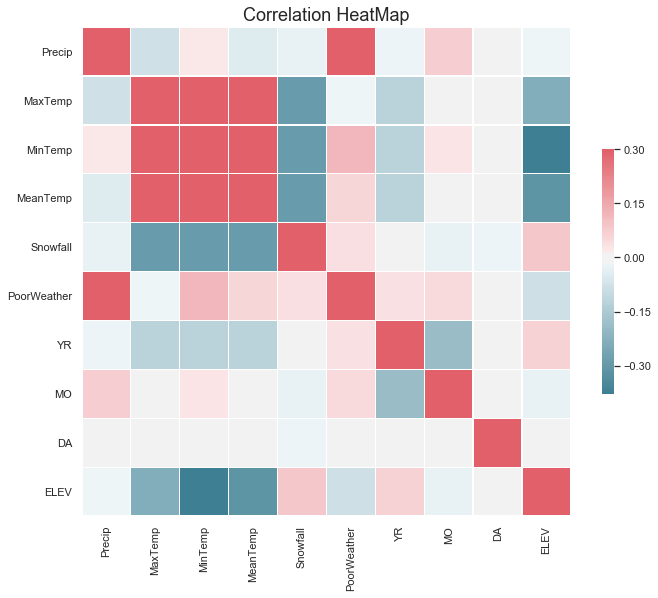

In [12]:
## plotting the correlation

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = train_df.corr(method='spearman')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlation HeatMap", fontsize=18)

plt.show()

The range of correlation is between -0.6 up to 0.2, so we can tell that the correlation is weak.
The order of x based on correlation to PoorWeather is Precip, MinTemp, MeanTemp, MO, YR, MaxTemp, DA, ELEV, Latitude, Longitude.

## Multiple Linear Correlation

In [13]:
train_df.shape

(17928, 10)

In [14]:
#separating data
X = train_df.iloc[:,train_df.columns != 'PoorWeather']
Y = train_df.iloc[:, 0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

In [15]:
#train model
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
#coeff of model
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

           Coefficient
Precip    1.000000e+00
MaxTemp   9.497869e-17
MinTemp   1.147621e-16
MeanTemp  8.724087e-17
Snowfall -9.162793e-18
YR        1.064968e-17
MO        1.858478e-17
DA        1.078577e-17
ELEV      4.542736e-15


In [17]:
y_pred = model.predict(X_test)

In [18]:
#checking prediction result vs actual
act_vs_pred = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred.astype(int)})
print(act_vs_pred.head(100))

        Actual  Predicted
17035   13.208         13
57724    4.064          4
11374    8.382          8
32044   28.194         28
59816  136.398        136
...        ...        ...
50494    0.000          0
7585     0.000          0
21112   21.336         21
36774    1.270          1
62793    0.000          0

[100 rows x 2 columns]


In [19]:
#model evaluation using Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

Intercept: 
 -5.950795411990839e-13
Root Mean Square Error 
 1.6820331888330267e-12
R^2 Value: 
 1.0


RMSE value is almost 0, so the model can predict approximately 100% accurate. Its indicate that the model is overfitting or something gone wrong while processing the data. Recall that PoorWeather is nominal data. So, multiple linear regression doesn't match to the data. Moreover, it has to use logistic regression.

## Y = Precip

In [20]:
train_df.columns

Index(['Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall', 'PoorWeather',
       'YR', 'MO', 'DA', 'ELEV'],
      dtype='object')

In [21]:
train_df2 = train_df[['MaxTemp', 'MinTemp', 'MeanTemp','YR','MO', 'DA', 'ELEV', 'Precip']]

In [22]:
#separating data
X2 = train_df2.iloc[:,train_df2.columns != 'Precip']
Y2 = train_df2.Precip
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state= 0)

In [23]:
#train model
model2 = linear_model.LinearRegression()
model2.fit(X2_train, Y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
#coeff of model
coeff2_df = pd.DataFrame(model2.coef_, X2.columns, columns=['Coefficient'])
print(coeff2_df)

          Coefficient
MaxTemp     -0.893531
MinTemp      0.364018
MeanTemp     0.683266
YR           0.002423
MO           0.177818
DA          -0.005684
ELEV         0.000573


In [25]:
y2_pred = model2.predict(X2_test)

In [26]:
#checking prediction result vs actual
act_vs_pred2 = pd.DataFrame({'Actual': Y2_test, 'Predicted': y2_pred})
print(act_vs_pred2.head(100))

        Actual  Predicted
17035   13.208   5.430247
57724    4.064   6.107808
11374    8.382   8.163956
32044   28.194  11.102826
59816  136.398   9.691974
...        ...        ...
50494    0.000   9.098053
7585     0.000   8.341043
21112   21.336   9.063581
36774    1.270   9.262017
62793    0.000  -0.053198

[100 rows x 2 columns]


In [27]:
#model evaluation using Root Mean Squared Deviation
rmsd2 = np.sqrt(mean_squared_error(Y2_test, y2_pred))      
r2_value2 = r2_score(Y2_test, y2_pred)                     

print("Intercept: \n", model2.intercept_)
print("Root Mean Square Error \n", rmsd2)
print("R^2 Value: \n", r2_value2)

Intercept: 
 7.899411332831792
Root Mean Square Error 
 14.560811664337368
R^2 Value: 
 0.025957536835834016


In [28]:
train_df

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,ELEV
403,0.254,24.444444,21.111111,22.777778,0.0,1,43,8,8,62
420,1.778,24.444444,21.111111,22.777778,0.0,1,43,8,25,62
421,2.540,25.000000,21.666667,23.333333,0.0,1,43,8,26,62
422,0.508,25.555556,20.000000,22.777778,0.0,1,43,8,27,62
426,1.016,26.666667,20.555556,23.888889,0.0,1,43,8,31,62
427,0.762,26.666667,20.000000,23.333333,0.0,1,43,9,1,62
430,0.508,27.222222,20.555556,23.888889,0.0,1,43,9,4,62
431,0.508,27.777778,20.555556,24.444444,0.0,1,43,9,5,62
435,4.826,26.111111,20.555556,23.333333,0.0,1,43,9,9,62
436,0.762,27.222222,22.222222,24.444444,0.0,1,43,9,10,62


## Manual

In [29]:
train_df.columns

Index(['Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall', 'PoorWeather',
       'YR', 'MO', 'DA', 'ELEV'],
      dtype='object')

In [30]:
#separating data

X = train_df[['MaxTemp', 'MinTemp', 'MeanTemp','YR','MO', 'DA', 'ELEV']]
Y = train_df[['Precip']]

In [31]:
m = len(train_df.Precip)
x0 = np.ones(m)
X = np.array([x0,train_df.MaxTemp,train_df.MinTemp,train_df.MeanTemp,train_df.YR,train_df.MO,train_df.DA,train_df.ELEV]).T
# Initial Coefficients
B = np.array([0, 0, 0, 0,0,0,0,0 ])
Y = np.array(train_df.Precip)

m = len(train_df['Precip'])
x0 = np.ones(m)
X3 = np.array([x0,train_df.MaxTemp,train_df.MinTemp,train_df.MeanTemp,train_df.ELEV,train_df.YR,train_df.MO, train_df.DA]).T
# Initial Coefficients
B = np.array([0, 0, 0, 0 , 0 , 0 , 0 , 0 ])
Y3 = np.array(train_df.Precip)

In [32]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)

In [33]:
#B = np.array([0, 0, 0, 0,0,0,0 ])

In [34]:
#m = 3585
#f = 6
#X3_train = X3[:m,:f]
#X3_train = np.c_[np.ones(len(X3_train),dtype='int64'),X3_train]

#y3_train = y3[:m]
#X3_test = X3[m:,:f]
#X3_test = np.c_[np.ones(len(X3_test),dtype='int64'),X3_test]
#y3_test = y3[m:]

In [35]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [36]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

137.5030969038376


In [37]:
alpha = 0.00001
iteration =135
newB, cost_history = gradient_descent(X, Y, B, alpha, iteration)

In [38]:
print(newB)

[ 0.00210465  0.05092168  0.04297295  0.04696686  0.092526    0.01869985
  0.03080771 -0.00136652]


In [39]:
print(cost_history[-1])

106.75622978957709


In [40]:
dfplot=pd.DataFrame(cost_history, columns=['cost'])
dfplot['iteration']=np.arange(1,iteration+1,1)
dfplot['cost']=dfplot['cost'].astype(float)
dfplot.head()

,cost,iteration
0,134.556516,1
1,132.312142,2
2,130.425468,3
3,128.751119,4
4,127.225262,5


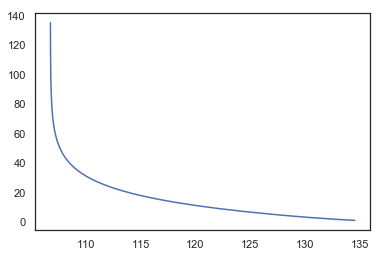

In [41]:
plt.plot(dfplot.cost,dfplot.iteration)

In [42]:
#X3_train.shape

In [43]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

In [44]:

def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [45]:
Y_pred = X.dot(newB)

In [46]:
print("RMSE : " + str(rmse(Y, Y_pred)))
print("R2 : " + str(r2_score(Y, Y_pred)))

RMSE : 14.612065548003601
R2 : 0.0057678612398101015
